# Explore here

### **PARTE 1:**  Cargo las Librerias, Funciones que se han diseñado para el Analisis, separo los Campos NEcesarios y Divido los datos en Train & Test

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_squared_error, r2_score

#=======================================================================================
#  Estudio Inicial de Columnas, Nullidad de la Data y Carateristicas de las Variables
#=======================================================================================
def estudo_Nullidad_caracteristicas(datosgenerales):
    columnas_numericas = datosgenerales.select_dtypes(include='number')
    columnas_categoricas = datosgenerales.select_dtypes(include=['object', 'category', 'bool'])
    resumen_numericas = pd.DataFrame({
        'columna': columnas_numericas.columns,
        'tipo': columnas_numericas.dtypes.values,
        'no_nulos': columnas_numericas.notnull().sum().values
    }).sort_values(by='no_nulos', ascending=False)
    resumen_categoricas = pd.DataFrame({
        'columna': columnas_categoricas.columns,
        'tipo': columnas_categoricas.dtypes.values,
        'no_nulos': columnas_categoricas.notnull().sum().values
    }).sort_values(by='no_nulos', ascending=False)
    print("📊 Columnas numéricas ordenadas (por cantidad de registros no nulos):")
    for _, fila in resumen_numericas.iterrows():
        print(f" - {fila['columna']} ({fila['no_nulos']} registros no nulos)")
    print(f"\nTotal columnas numéricas: {len(resumen_numericas)}")
    print("\n🔠 Columnas categóricas ordenadas (por cantidad de registros no nulos):")
    for _, fila in resumen_categoricas.iterrows():
        print(f" - {fila['columna']} ({fila['no_nulos']} registros no nulos)")
    print(f"\nTotal columnas categóricas: {len(resumen_categoricas)}")
    print(datosgenerales.shape)

#===============================================================================
#                Ceros En los Datos
#===============================================================================
def columnas_con_ceros(df):
    total_filas = len(df)
    conteo_ceros = (df == 0).sum()
    columnas_con_ceros = conteo_ceros[conteo_ceros > 0]
    porcentaje_ceros = (columnas_con_ceros / total_filas * 100).round(2).astype(str) + '%'
    resultado = pd.DataFrame({
        'Total_Ceros': columnas_con_ceros,
        'Porcentaje': porcentaje_ceros    })
    return resultado

#===============================================================================
#                Box Plots 2
#===============================================================================
def box_plots_2(dataframe2,variables):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4)) 
    for i, var in enumerate(variables):
        sns.boxplot(ax=axes[i], y=dataframe2[var])  
        axes[i].set_title(f'{var}', fontsize=10)
        axes[i].tick_params(labelsize=8)
        axes[i].grid(True)
    plt.tight_layout()
    plt.show()

def box_plots_3(datafarab3,campo_x,campo_y,titulob3):
    top_10_brands = datafarab3[campo_x].value_counts().nlargest(20).index
    plt.figure(figsize=(12, 4))
    sns.boxplot(
        x=campo_x,
        y=campo_y,
        data=datafarab3[datafarab3[campo_x].isin(top_10_brands)],
        order=top_10_brands,
        palette='Spectral'
    )
    plt.xticks(rotation=45)
    plt.title(titulob3)
    plt.show()
#===============================================================================
#        Esta Grafica me permite el histograma de los datos
#===============================================================================
def graficar_histogramas(dataframe, columnas, filas, columnas_por_fila, bins=50):
    total = len(columnas)
    total_subplots = filas * columnas_por_fila
    fig, axes = plt.subplots(filas, columnas_por_fila, figsize=(5 * columnas_por_fila, 4 * filas))
    axes = axes.flatten()
    for i, col in enumerate(columnas):
        sns.histplot(data=dataframe, x=col, ax=axes[i], bins=bins)
        axes[i].set_title(f"Distribución de {col}")
    for j in range(len(columnas), total_subplots):
        fig.delaxes(axes[j]) 
    plt.tight_layout()
    plt.show()

In [ ]:
#===============================================================================
#                Cargar Archivos
#===============================================================================

Ruta_Arch = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"

total_data= pd.read_csv(Ruta_Arch, sep = ",")


In [13]:
estudo_Nullidad_caracteristicas(total_data)

📊 Columnas numéricas ordenadas (por cantidad de registros no nulos):
 - MedInc (20640 registros no nulos)
 - HouseAge (20640 registros no nulos)
 - AveRooms (20640 registros no nulos)
 - AveBedrms (20640 registros no nulos)
 - Population (20640 registros no nulos)
 - AveOccup (20640 registros no nulos)
 - Latitude (20640 registros no nulos)
 - Longitude (20640 registros no nulos)
 - MedHouseVal (20640 registros no nulos)

Total columnas numéricas: 9

🔠 Columnas categóricas ordenadas (por cantidad de registros no nulos):

Total columnas categóricas: 0
(20640, 9)


In [15]:
# Lo solicitado en la practica es Agrupar por Ingesos, LAtitud y Longitud
total_data2 = total_data[['Latitude', 'Longitude', 'MedInc']]

In [16]:
# Divido la Data en Train & Test
X_train, X_test = train_test_split(total_data2, test_size=0.2, random_state=42)
X_train.shape

(16512, 3)

### **PARTE 2:** Construye un K-Means.  Se pide clasificar los datos en 6 clusters utilizando, para ello, el modelo K-Means.  almacena el cluster al que pertenece cada casa como una columna nueva del dataset. Podrías llamarla cluster.

In [20]:
# Modelo
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [21]:
# Listamos las Etiquetas y las cargamos en una nueva columna 
y_train=list(model.labels_)
X_train['clusters']=y_train
X_train.columns

Index(['Latitude', 'Longitude', 'MedInc', 'clusters'], dtype='object')

In [22]:
X_train.shape

(16512, 4)

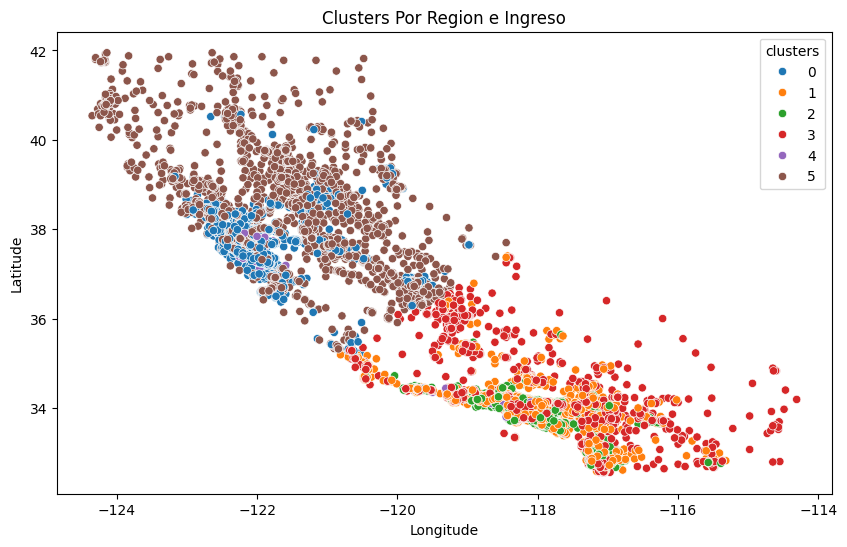

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train, x="Longitude", y="Latitude", hue="clusters", palette="tab10")
plt.title("Clusters Por Region e Ingreso")
plt.show()


### **Parte 3:** Probar el modelo con el **data Test**

In [27]:
y_test = list(model.predict(X_test))
X_test["clusters"] = y_test
X_test.head(5)

,Latitude,Longitude,MedInc,clusters
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,5


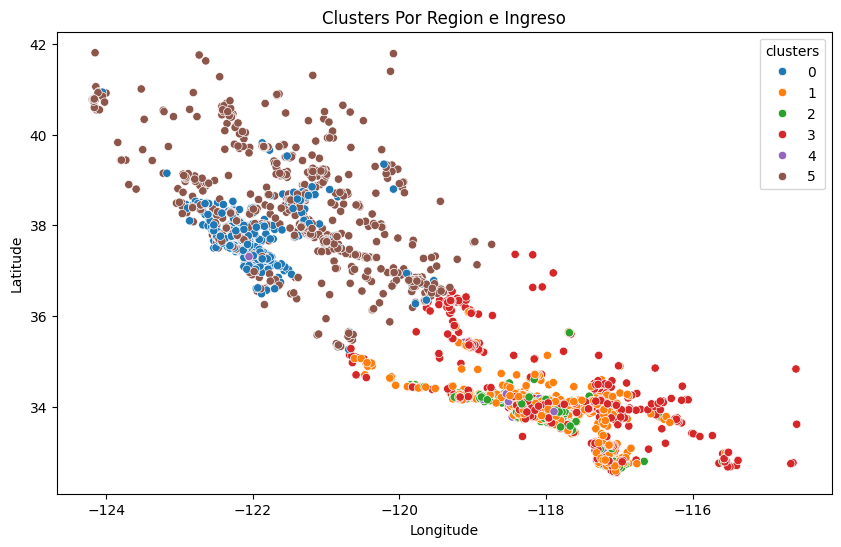

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_test, x="Longitude", y="Latitude", hue="clusters", palette="tab10")
plt.title("Clusters Por Region e Ingreso")
plt.show()

### **PARTE 4:** Entrena un modelo de clasificación supervisada

In [30]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(random_state = 42)
model_DT.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [33]:
tree = export_text(model_DT, feature_names = list(X_train.columns))
print(tree)

|--- clusters <= 4.50
|   |--- MedInc <= 3.39
|   |   |--- clusters <= 2.00
|   |   |   |--- class: 1
|   |   |--- clusters >  2.00
|   |   |   |--- class: 3
|   |--- MedInc >  3.39
|   |   |--- clusters <= 0.50
|   |   |   |--- class: 0
|   |   |--- clusters >  0.50
|   |   |   |--- clusters <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- clusters >  1.50
|   |   |   |   |--- clusters <= 2.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- clusters >  2.50
|   |   |   |   |   |--- MedInc <= 5.92
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- MedInc >  5.92
|   |   |   |   |   |   |--- class: 4
|--- clusters >  4.50
|   |--- class: 5



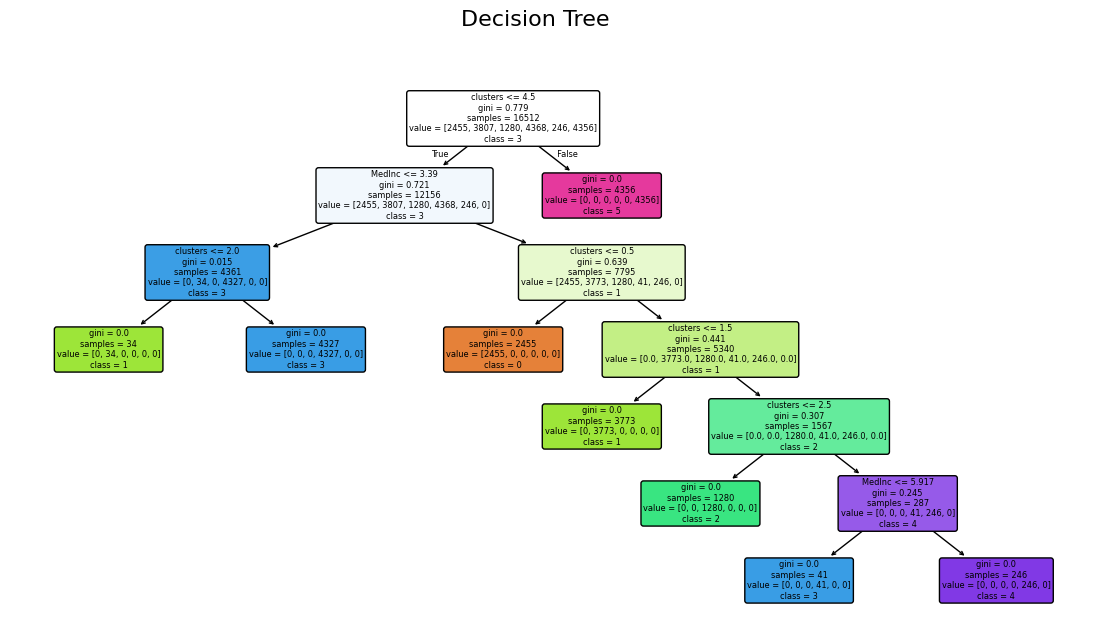

In [34]:
fig = plt.figure(figsize=(14, 7))
fig.suptitle("Decision Tree", fontsize=16)

plot_tree(
    model_DT, 
    feature_names = list(X_train.columns), 
    class_names = ["0", "1", "2", "3", "4", "5"], 
    filled = True, 
    rounded = True)

plt.show()

In [39]:
y_pred = model_DT.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], shape=(4128,), dtype=int32)

#### En el Vector **y_test** se tiene la clasificacion realizada con el modelo no supervisado.  Y en el vector **y_pred** se tiene la clasificación realizada con un **"Decision Tree"**.  Compararemos con el Accuracy_score para ver que tan diferente son.

In [40]:
accuracy_score(y_test, y_pred)

1.0

#### De acuerdo con accuracy_score, se tiene que y_test y y_pred (y_test Prediccón con k-meanscu y_pred roviene del Decisión_Tree) nos da una coincidenciaa

### **PARTE 5:** Salvar el Modélo

In [29]:
from pickle import dump

dump(model, open("../models/k-means_default_42.sav", "wb"))